In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

In [2]:
df = pd.read_csv('fer2013/fer2013/fer2013.csv')

In [3]:
df.shape

(35887, 3)

In [4]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [35]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

<AxesSubplot: xlabel='emotion', ylabel='Usage'>

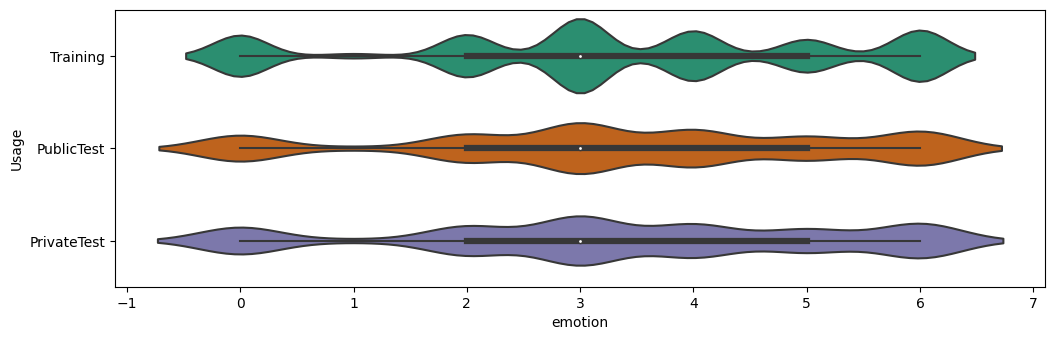

In [8]:
figsize = (12, 1.2 * len(df['Usage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='emotion', y='Usage', inner='box', palette='Dark2')

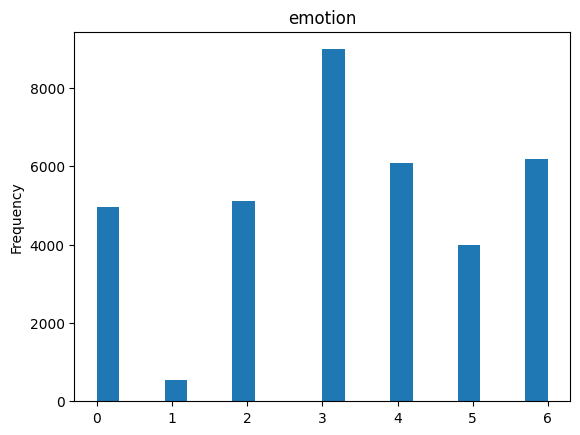

In [9]:
df['emotion'].plot(kind='hist', bins=20, title='emotion')
plt.show()

In [10]:
emotion_label= {0:'anger',1:'disgust',2:'fear',3:'happiness',4:'sadness',5:'surprise',6:'neutral'}
emotion_label

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

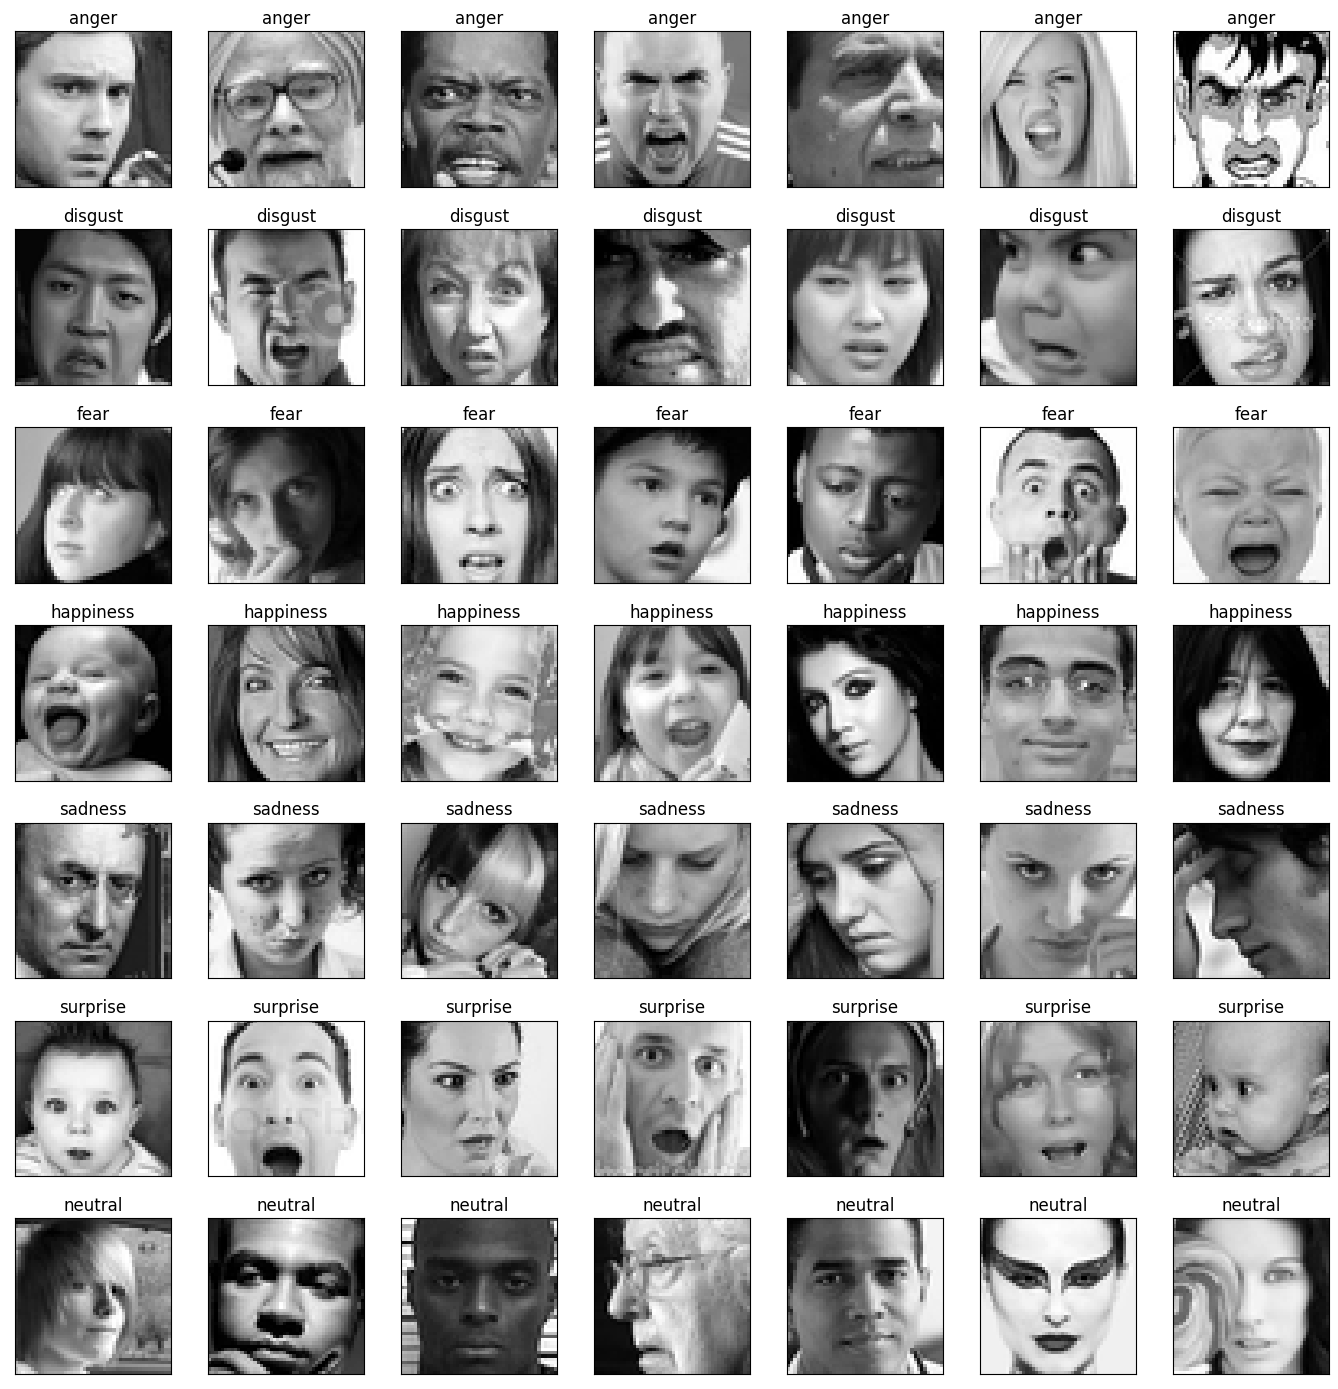

In [18]:
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        # reshaped to a 48x48 matrix and cast to float32.
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label [label])
        plt.tight_layout()

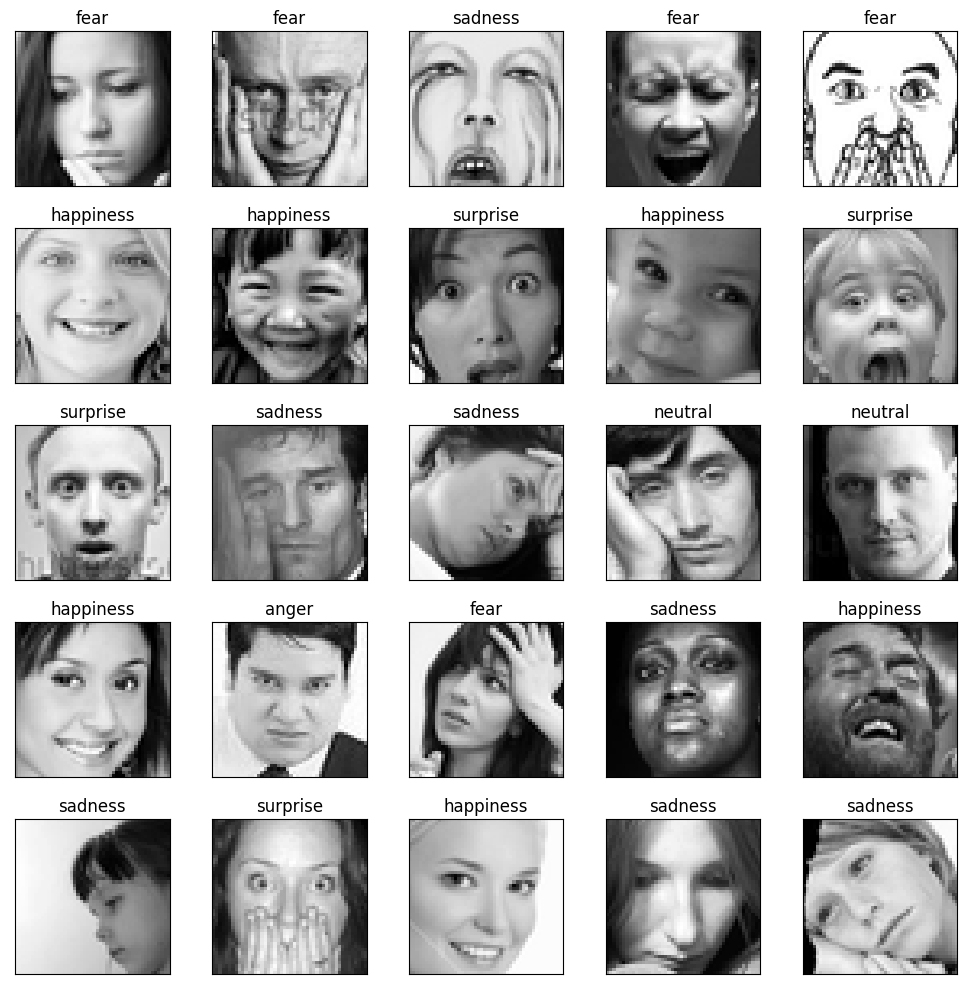

In [13]:
import random

# Assuming df is your DataFrame containing the pixel values and emotion labels

fig = plt.figure(1, (10, 10))
num_rows, num_cols = 5, 5  # You can adjust the number of rows and columns as per your preference

# Shuffle the DataFrame indices randomly
random_indices = random.sample(range(len(df)), num_rows * num_cols)

for i, index in enumerate(random_indices):
    label = df.iloc[index]['emotion']
    px = np.array(df.iloc[index]['pixels'].split(' ')).reshape(48, 48).astype('float32')

    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.imshow(px, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(emotion_label[label])

plt.tight_layout()
plt.show()

In [19]:
# Define custom dataset class for FER2013
class FER2013Dataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = self.data.iloc[idx, 1]
        pixels = [int(pixel) for pixel in img_name.split(' ')]
        image = torch.tensor(pixels, dtype=torch.float32).reshape(48, 48)

        label = int(self.data.iloc[idx, 0])
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# # Define transformations for preprocessing
# transform = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Grayscale(num_output_channels=1),
#     transforms.Resize((64, 64)),  # Resize the images to match model input size
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))
# ])
transform = None
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

df = pd.read_csv('fer2013/fer2013/fer2013.csv')
training = df[df['Usage'] == 'Training']
validation = df[df['Usage'] == 'PublicTest']
testing = df[df['Usage'] == 'PrivateTest']

# Load FER2013 dataset

train_set = FER2013Dataset(data = training, transform=transform)
valid_set = FER2013Dataset(data = validation, transform=transform)
test_set = FER2013Dataset(data = testing, transform=transform)


# Create data loaders
batch_size = 32
data_loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True)
data_loader_validation = DataLoader(valid_set, batch_size=batch_size, shuffle=True)
data_loader_test = DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [20]:
for i, (inputs, labels) in enumerate(data_loader_train):
    print(f"Batch {i}:")
    print("Inputs:", inputs.shape)
    print("Labels:",labels.shape)

Batch 0:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 1:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 2:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 3:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 4:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 5:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 6:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 7:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 8:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 9:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 10:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 11:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 12:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 13:
Inputs: torch.Size([32, 1, 48, 48])
Labels: torch.Size([32])
Batch 14:
Inputs

KeyboardInterrupt: 

In [21]:
# Define your Sequential Conv2D model
model = nn.Sequential(
    # Convolutional layer 1
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),


    # Convolutional layer 2
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Convolutional layer 3
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Flatten the output for fully connected layers
    nn.Flatten(),

    # Fully connected layers
    nn.Linear(64 * 6 * 6, 128),  # Adjust the input size based on the output size of the previous layer
    nn.ReLU(),
    nn.Linear(128, 7)  # Adjust the output size based on the number of classes in your classification task
)

# Print the model architecture
print(model)


Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=2304, out_features=128, bias=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=7, bias=True)
)


In [22]:
# Move model and data to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 3
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in data_loader_train:

        #this shoul be added only if running in GPU, otherwise comment
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(data_loader_train)}")

# Save the model state
torch.save(model.state_dict(), 'model_weights.pth')

Epoch [1/3], Loss: 1.6732652420987
Epoch [2/3], Loss: 1.4482483279731597
Epoch [3/3], Loss: 1.3360286968322532


In [5]:
# Load and evaluate the model
model.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [26]:
def split_dataset(loader):
    # Create a DataLoader for the dataset
    # loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Initialize lists to store the features and labels
    features = []
    labels = []

    # Iterate through the DataLoader
    for imgs, lbls in loader:
        # Depending on your model, you might want to move your tensors to a device like CUDA
        imgs, lbls = imgs.cuda(), lbls.cuda()
        
        # Append the batch to the lists
        features.append(imgs)
        labels.append(lbls)

    # Concatenate all batches
    features = torch.cat(features, dim=0)
    labels = torch.cat(labels, dim=0)
    

    return features, labels

# Now, you can use this function to split your test_set
X_test, Y_test = split_dataset(data_loader_test)
print(data_loader_test)

In [29]:
for i, (inputs, labels) in enumerate(data_loader_test):
    print(f"Batch {i}:")
    # print("Inputs:", inputs.shape)
    print("Labels:",labels)

Batch 0:
Labels: tensor([2, 3, 2, 2, 6, 5, 0, 2, 2, 6, 4, 3, 5, 5, 2, 0, 3, 2, 4, 1, 4, 0, 2, 5,
        0, 4, 6, 3, 3, 2, 3, 4])
Batch 1:
Labels: tensor([4, 5, 3, 6, 4, 3, 5, 5, 4, 4, 6, 0, 4, 6, 2, 4, 4, 6, 2, 4, 5, 2, 2, 3,
        4, 5, 4, 5, 3, 2, 3, 0])
Batch 2:
Labels: tensor([4, 3, 4, 0, 6, 3, 6, 5, 3, 2, 6, 4, 2, 2, 3, 0, 0, 2, 1, 6, 3, 5, 2, 5,
        6, 6, 3, 2, 4, 2, 2, 2])
Batch 3:
Labels: tensor([5, 3, 4, 6, 4, 5, 3, 6, 3, 3, 2, 3, 3, 4, 3, 6, 0, 3, 5, 3, 5, 3, 2, 0,
        6, 4, 6, 5, 3, 3, 2, 0])
Batch 4:
Labels: tensor([3, 5, 0, 2, 0, 0, 4, 5, 3, 2, 6, 3, 4, 4, 0, 4, 2, 4, 4, 5, 6, 3, 3, 2,
        1, 5, 3, 3, 4, 2, 4, 4])
Batch 5:
Labels: tensor([3, 5, 3, 3, 0, 3, 0, 6, 3, 5, 5, 4, 6, 2, 5, 5, 0, 3, 4, 3, 5, 4, 6, 2,
        6, 3, 0, 3, 2, 4, 6, 4])
Batch 6:
Labels: tensor([6, 6, 6, 4, 5, 3, 4, 5, 6, 6, 3, 3, 5, 4, 2, 3, 4, 3, 4, 3, 6, 3, 4, 4,
        5, 1, 3, 5, 0, 4, 2, 0])
Batch 7:
Labels: tensor([0, 6, 4, 2, 6, 3, 3, 3, 4, 0, 3, 2, 2, 3, 2, 2, 3, 2, 5, 4, 3, 2,

In [37]:
# evaluate model at end of epoch
# def get_accuracy():
model.eval()
y_pred = model(X_test)
acc = 0
count = 0
for pred, test in zip(y_pred, Y_test):
    acc += (torch.argmax(pred) == test).float()
    count+=1
acc = acc/count    
print(f"Accuracy is {acc}")


Accuracy is 0.4873223900794983


In [25]:
print(y_pred.shape)
print(Y_test.shape)
print(y_pred[1])

torch.Size([3589, 7])
torch.Size([3589])
tensor([ 0.9678, -3.3504,  2.6871, -3.5845,  0.5401,  0.4341,  0.7030],
       device='cuda:0', grad_fn=<SelectBackward0>)
